In [1]:
from Bio import SeqIO
from Bio.SeqIO import AbiIO
import os
import seaborn as sns

In [2]:
seq_files = [f for f in os.listdir(os.getcwd()) if f[-4:] == '.seq']
seq_files

['0-Mn-fw-EM-28-r1.seq',
 '0-Mn-fw-EM-28.seq',
 '0-Mn-fw-r2-EM-28.seq',
 '0-Mn-re-EM-27.seq',
 '10-Mn-fw-EM-28-r1.seq',
 '10-Mn-fw-r2-EM-28.seq',
 '15-Mn-fw-EM-28.seq',
 '15-Mn-re-EM-27.seq',
 '20-Mn-fw-EM-28-r1.seq',
 '20-Mn-Fw-EM-28.seq',
 '20-Mn-fw-r2-EM-28.seq',
 '20-Mn-re-EM-27.seq',
 '25-Mn-fw-EM-28-r1.seq',
 '25-Mn-fw-EM-28.seq',
 '25-Mn-re-EM-27.seq',
 '30-Mn-fw-EM-28-r1.seq',
 '30-Mn-fw-EM-28.seq',
 '30-Mn-fw-r2-EM-28.seq',
 '30-Mn-re-EM-27.seq',
 '35-Mn-fw-EM-28-r1.seq',
 '35-Mn-fw-EM-28.seq',
 '35-Mn-re-EM-27.seq',
 '40-Mn-fw-EM-28-r1.seq',
 '40-Mn-fw-r2-EM-28.seq',
 '50-Mn-fw-EM-28-r1.seq',
 '50-Mn-fw-r2-EM-28.seq',
 '55-Mn-fw-EM-28.seq',
 '55-Mn-re-EM-27.seq']

In [3]:
abi_files = [f for f in os.listdir(os.getcwd()) if f[-4:] == '.ab1']
abi_files

['0-Mn-fw-EM-28.ab1',
 '0-Mn-re-EM-27.ab1',
 '15-Mn-fw-EM-28.ab1',
 '15-Mn-re-EM-27.ab1',
 '20-Mn-Fw-EM-28.ab1',
 '20-Mn-re-EM-27.ab1',
 '25-Mn-fw-EM-28.ab1',
 '25-Mn-re-EM-27.ab1',
 '30-Mn-fw-EM-28.ab1',
 '30-Mn-re-EM-27.ab1',
 '35-Mn-fw-EM-28.ab1',
 '35-Mn-re-EM-27.ab1',
 '55-Mn-fw-EM-28.ab1',
 '55-Mn-re-EM-27.ab1']

In [4]:
sequences = []
traces = []
for f in seq_files:
    seq = SeqIO.read(f, 'fasta')
    seq.id = f
    seq.name = f
    seq.description = f
    sequences.append(seq)
    
sequences

[SeqRecord(seq=Seq('NNNNNNNNNNNNGAAGACTGACAATAACTTATTCATCGTCGATGATGTGGGAGA...NNN', SingleLetterAlphabet()), id='0-Mn-fw-EM-28-r1.seq', name='0-Mn-fw-EM-28-r1.seq', description='0-Mn-fw-EM-28-r1.seq', dbxrefs=[]),
 SeqRecord(seq=Seq('CNNNNNAANGNGNANNNNAANTCNTNNNNNNNNAACTNNNNNNNNNNNNNNNNN...NNN', SingleLetterAlphabet()), id='0-Mn-fw-EM-28.seq', name='0-Mn-fw-EM-28.seq', description='0-Mn-fw-EM-28.seq', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNNNNNNNNNGNNNNNNNNNNNNNNNNNNNNGNNNNNNNNNNNNNNNNAN...NNN', SingleLetterAlphabet()), id='0-Mn-fw-r2-EM-28.seq', name='0-Mn-fw-r2-EM-28.seq', description='0-Mn-fw-r2-EM-28.seq', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNNTNNNNACNGNCNNNANNNCTGACAATATCTTATTCATCCTCNATGAT...NNN', SingleLetterAlphabet()), id='0-Mn-re-EM-27.seq', name='0-Mn-re-EM-27.seq', description='0-Mn-re-EM-27.seq', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNNNNNAGNNGACTNACAATAACTTATTCATCGTCGATGATNNAGGGAGA...NNN', SingleLetterAlphabet()), id='10-Mn-fw-EM-28-r1.seq', name='10-Mn-fw-EM-28-r1.seq', 

In [5]:
# Open the original sequence
original = SeqIO.read('../../data/victoria-pb2.fasta', 'fasta')
original = original[1600:]
original

SeqRecord(seq=Seq('AGAGACTGACAATAACTTATTCATCGTCGATGATGTGGGAGATTAACGGTCCTG...TAC', SingleLetterAlphabet()), id='A/Victoria/361/2011|KJ942687', name='A/Victoria/361/2011|KJ942687', description='A/Victoria/361/2011|KJ942687', dbxrefs=[])

In [6]:
# Write the "fw" to disk
fw_sequences = [s for s in sequences if '-fw-' in s.id]
fw_sequences.append(original)
SeqIO.write(fw_sequences, 'forward.fasta', 'fasta')
# fw_sequences

21

In [7]:
re_sequences = [s for s in sequences if '-re' in s.id or '-Re-' in s.id]
SeqIO.write(re_sequences, 'reverse.fasta', 'fasta')

7

In [8]:
# from Bio.Align.Applications import ClustalOmegaCommandline

# cline = ClustalOmegaCommandline(infile='forward.fasta', outfile='forward.aligned.fasta', verbose=True, auto=True, force=True)
# cline()

('Using 4 threads\nRead 21 sequences (type: DNA) from forward.fasta\nnot more sequences (21) than cluster-size (100), turn off mBed\nSetting options automatically based on input sequence characteristics (might overwrite some of your options).\nAuto settings: Enabling mBed.\nAuto settings: Setting iteration to 1.\nUsing 19 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 21 sequences)\nCalculating pairwise ktuple-distances...\nKtuple-distance calculation progress: 0 % (0 out of 228)\nKtuple-distance calculation progress: 1 % (3 out of 228)\nKtuple-distance calculation progress: 13 % (30 out of 228)\nKtuple-distance calculation progress: 15 % (35 out of 228)\nKtuple-distance calculation progress: 19 % (45 out of 228)\nKtuple-distance calculation progress: 28 % (64 out of 228)\nKtuple-distance calculation progress: 32 % (73 out of 228)\nKtuple-distance calculation progress: 34 % (78 out of 228)\nKtuple-distance calculation progress: 43 % (99 out of 228

In [9]:
from Bio import AlignIO

aln = AlignIO.read('forward.aligned.fasta', 'fasta')
print(aln[:, 100:-100])

SingleLetterAlphabet() alignment with 21 rows and 904 columns
TGAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATT...--- 0-Mn-fw-EM-28-r1.seq
TGAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATT...--- 0-Mn-fw-EM-28.seq
TGAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATT...C-T 0-Mn-fw-r2-EM-28.seq
TGAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATT...--- 10-Mn-fw-EM-28-r1.seq
TGAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATT...--- 10-Mn-fw-r2-EM-28.seq
TGAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATT...--- 15-Mn-fw-EM-28.seq
TGAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATT...--- 20-Mn-fw-EM-28-r1.seq
TGAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATT...--- 20-Mn-fw-r2-EM-28.seq
TGAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATT...--- 25-Mn-fw-EM-28-r1.seq
GTGGTACCTCTAGAGTNNTACCTATCAATGGATCATCAGAAATT...--- 25-Mn-fw-EM-28.seq
TGAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATT...--- 30-Mn-fw-EM-28-r1.seq
CGACCTTGTTTCTACACGCGTGGTACCTCTAGAGTACAGAAATT...--- 30-Mn-fw-EM-28.seq
TGAGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATT...--- 30-Mn-fw-r2-EM-28.seq
TGAG

In [10]:
from Levenshtein import distance

In [11]:
# Analyze the forward sequences
mn_00 = aln[2].seq
mn_25 = aln[0].seq
mn_55 = aln[1].seq

print(distance(str(original[150:-150].seq), str(mn_00[150:-150]), ))
print(distance(str(original[150:-150].seq), str(mn_25[150:-150]), ))
print(distance(str(original[150:-150].seq), str(mn_55[150:-150]), ))

364
366
366


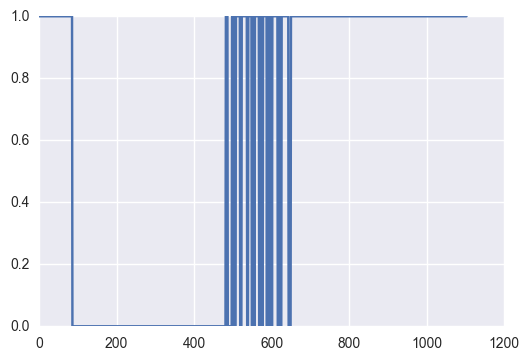

In [12]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
num_gaps = []
window_length = 5
for pos in range(aln.get_alignment_length()):
    temp_aln = aln[:, pos:pos+window_length]
    letters = Counter()
    for i in range(temp_aln.get_alignment_length()):
        letters = letters + Counter(temp_aln[:, i])
    # letters = Counter(aln[:, pos:pos+10])
    
    
    # b = bool(int(letters['-']/window_length))
    b = bool(int((letters['-'] + letters['N'])/window_length))
    num_gaps.append(b)
plt.plot(num_gaps)
# plt.ylim(-1, 3)

In [13]:
# identify the longest sequence of zeros amongst smoothed out data.
from itertools import groupby

def find_midpoint_of_longest_zeros(num_gaps):
    idx_longest_zeros = 0
    longest_zeros = [0]
    pos_counter = 0
    for i, (elm, grp) in enumerate(groupby(num_gaps)):
        grp = list(grp)
        if not elm and len(grp) > len(longest_zeros):
            longest_zeros = grp
            idx_longest_zeros = pos_counter
        pos_counter += len(grp)
    
    return int((idx_longest_zeros + len(longest_zeros)) / 2)

find_midpoint_of_longest_zeros(num_gaps)

241

In [14]:
midpt = find_midpoint_of_longest_zeros(num_gaps)

In [15]:
import pymc3 as pm
import numpy as np

In [16]:
positions = np.arange(0, len(num_gaps))
with pm.Model() as model:
    switchpoint1 = pm.DiscreteUniform('switchpoint1', lower=0, upper=midpt)
    switchpoint2 = pm.DiscreteUniform('switchpoint2', lower=midpt, upper=len(num_gaps))
    
    p = pm.Uniform('p1', lower=0, upper=1, shape=4)

    rate1 = pm.math.switch(positions < switchpoint1, p[0], p[1])
    rate2 = pm.math.switch(positions > switchpoint2, p[2], p[3])
    
    mutations1 = pm.Bernoulli('mutations1', p=rate1, observed=num_gaps)
    mutations2 = pm.Bernoulli('mutations2', p=rate2, observed=num_gaps)

Applied interval-transform to p1 and added transformed p1_interval_ to model.


In [17]:
with model:
    step1 = pm.NUTS([p])

    # Use Metropolis for switchpoint, and missing values since it accommodates discrete variables
    step2 = pm.Metropolis([switchpoint1, switchpoint2])
    start = pm.find_MAP()
    trace = pm.sample(5000, start=start, step=[step1, step2])

100%|██████████| 5000/5000 [00:29<00:00, 170.60it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cbae780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ce03160>]], dtype=object)

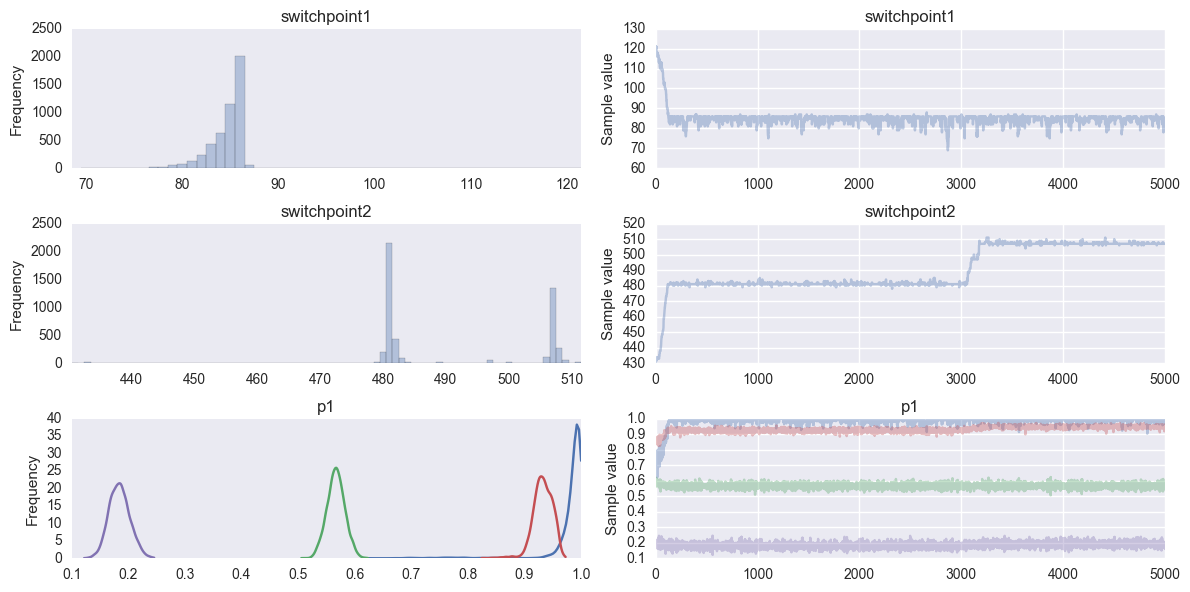

In [18]:
pm.traceplot(trace)

In [19]:
burnin = 1000
start = int(np.percentile(trace['switchpoint1'][burnin:], 97.5, axis=0))
start

86

In [20]:
end = int(np.percentile(trace['switchpoint2'][burnin:], 2.5, axis=0))
end

480

In [21]:
aln_trimmed = aln[:, start:end]
concs = []
muts = []
for i in range(len(aln_trimmed) - 1):
    dist = distance(str(aln_trimmed[i].seq), str(aln_trimmed[-1].seq))
    print(aln_trimmed[i].id, dist)
    
    concs.append(int(aln_trimmed[i].id.split('-')[0])/100)
    muts.append(dist)

0-Mn-fw-EM-28-r1.seq 0
0-Mn-fw-EM-28.seq 0
0-Mn-fw-r2-EM-28.seq 6
10-Mn-fw-EM-28-r1.seq 0
10-Mn-fw-r2-EM-28.seq 0
15-Mn-fw-EM-28.seq 16
20-Mn-fw-EM-28-r1.seq 1
20-Mn-fw-r2-EM-28.seq 0
25-Mn-fw-EM-28-r1.seq 1
25-Mn-fw-EM-28.seq 25
30-Mn-fw-EM-28-r1.seq 3
30-Mn-fw-EM-28.seq 40
30-Mn-fw-r2-EM-28.seq 1
35-Mn-fw-EM-28-r1.seq 1
35-Mn-fw-EM-28.seq 7
40-Mn-fw-EM-28-r1.seq 1
40-Mn-fw-r2-EM-28.seq 1
50-Mn-fw-EM-28-r1.seq 5
50-Mn-fw-r2-EM-28.seq 1
55-Mn-fw-EM-28.seq 12


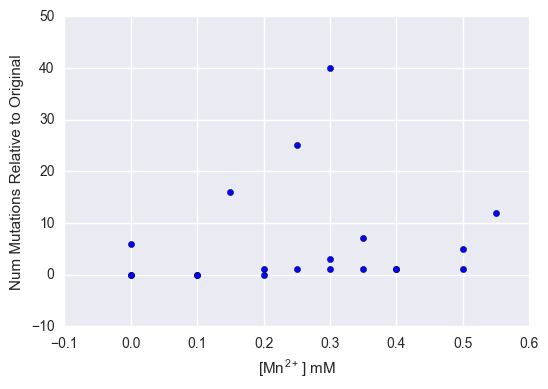

In [22]:
plt.scatter(x=concs, y=muts)
# plt.plot(concs, muts)
plt.ylabel('Num Mutations Relative to Original')
plt.xlabel('$\mathregular{[Mn^{2+}]}$ mM')

In [23]:
sorted_concs = sorted(list(set(concs)))
concs_idx = dict()
for i, c in enumerate(sorted_concs):
    concs_idx[c] = i
    
indices = []
for c in concs:
    indices.append(concs_idx[c])
indices

[0, 0, 0, 1, 1, 2, 3, 3, 4, 4, 5, 5, 5, 6, 6, 7, 7, 8, 8, 9]

In [24]:
with pm.Model() as model_mut:
    num_mutations = pm.Uniform('num_mutations', 0, 1000, shape=len(sorted_concs))
    variance = pm.HalfCauchy('variance', beta=1, shape=len(sorted_concs))
    
    mu = num_mutations[indices]
    sig = variance[indices]
    
    like = pm.Normal('likelihood', mu=mu, sd=sig, observed=muts)  
    

Applied interval-transform to num_mutations and added transformed num_mutations_interval_ to model.
Applied log-transform to variance and added transformed variance_log_ to model.


In [25]:
with model_mut:
    params_mut = pm.variational.advi(n=100000)
    trace_mut = pm.variational.sample_vp(params_mut, draws=10000,)

Iteration 0 [0%]: ELBO = -6690821.58
Iteration 10000 [10%]: Average ELBO = -2460502.15
Iteration 20000 [20%]: Average ELBO = -473.84
Iteration 30000 [30%]: Average ELBO = -145.89
Iteration 40000 [40%]: Average ELBO = -136.07
Iteration 50000 [50%]: Average ELBO = -129.61
Iteration 60000 [60%]: Average ELBO = -124.81
Iteration 70000 [70%]: Average ELBO = -122.22
Iteration 80000 [80%]: Average ELBO = -120.85
Iteration 90000 [90%]: Average ELBO = -120.47
Finished [100%]: Average ELBO = -120.05


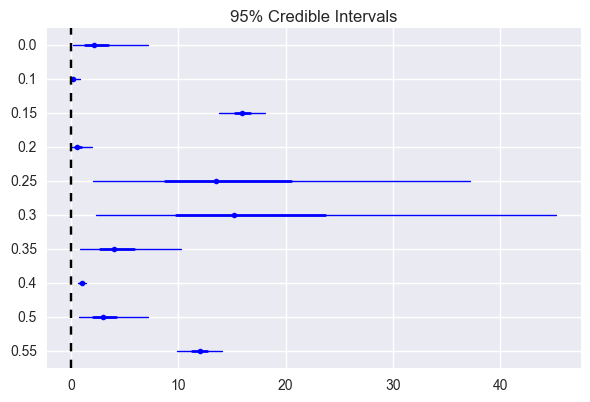

In [26]:
pm.forestplot(trace_mut, varnames=['num_mutations'], ylabels=sorted(set([str(i) for i in concs])))